Link dashboard Tableu : https://public.tableau.com/app/profile/muhammad.insani/viz/Muhammad_Insani/Dashboard1

sumber dataset [global-super-store-dataset](https://www.kaggle.com/datasets/apoorvaappz/global-super-store-dataset/data)

# Identifikasi Masalah

## SMART

### S - Specific
Meningkatkan profitabilitas dan daya saing perusahaan melalui optimalisasi strategi pemasaran dan distribusi dengan fokus pada segmen pelanggan yang memberikan profit signifikan.

### M - Measurable
Mencapai pertumbuhan keuntungan sebesar 20% dalam kategori produk tertentu.

### A - Achievable
diimplementasikan dengan merancang strategi penjualan, distribusi, dan kebijakan diskon

### R - Relevant
Keseluruhan strategi berkaitan dengan kepuasan pelanggan, penjualan produk tertentu, dan efisiensi distribusi untuk menciptakan pertumbuhan jangka panjang dan keunggulan kompetitif.

### T - Time-bound
Dalam satu kuartal

## Problem Statement

Menghadapi tantangan dalam meningkatkan profitabilitas perusahaan dengan strategi pemasaran dan distribusi yang terfokus pada segmen yang memberikan profit signifikan, dengan target pertumbuhan keuntungan sebesar 20% dalam kategori produk tertentu, diimplementasikan dengan merancang strategi penjualan, distribusi, dan kebijakan diskon dalam satu kuartal untuk mencapai pertumbuhan jangka panjang dan keunggulan kompetitif.

## 5W+1H

### Who (Siapa):
Siapa segmen pelanggan utama yang memberikan kontribusi signifikan terhadap profit?

### What (Apa):
Apakah pelanggan yang sering berkunjung memberikan kontribusi pendapatan yang lebih besar?

### When (Kapan):
Kapan waktu yang paling strategis untuk memperbarui atau meluncurkan produk baru agar memaksimalkan tren pasar yang meningkat?

### Where (Di mana):
Di mana distribusi produk paling efisien dan mengoptimalkan biaya pengiriman?

### Why (Mengapa):
Mengapa terjadi fluktuasi dalam tingkat kepuasan pelanggan?

### How (Bagaimana):
Bagaimana merancang strategi pemasaran yang lebih tepat terkait dengan waktu pengiriman?

# Data Preparation

## Data Loading

In [686]:
import pandas as pd

df = pd.read_csv('Global_Superstore2.csv', encoding='latin-1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


Insight : Berdasarkan data diatas dapat disimpulkan bahwa data pada csv dapat menampilkan beberapa data dari tabel tetapi dengan format yang belum disesuaikan dengan kebutuhan analisis

## Data Explore

In [687]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

Insight : Terdapat 24 Kolom dan 51290 data, type data yg digunakan dominan menggunakan object. pada kolom order date ship date type datanya perlu disesuaikan

In [688]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

Insight : tidak terdapat spasi berlebih pada nama kolom, dan beberapa kolom akan dihilangkan disesuaikan dengan kebutuhan analisis

## Data Cleaning

In [689]:
#menghapus kolom yang mungkin tidak diperlakukan untuk kebutuhan analisis
df=df.drop(['Row ID','Postal Code','Ship Mode','Customer Name','Order Priority','Market','Product Name','Category','Sub-Category'], axis=1)
df.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Customer ID', 'Segment', 'City',
       'State', 'Country', 'Region', 'Product ID', 'Sales', 'Quantity',
       'Discount', 'Profit', 'Shipping Cost'],
      dtype='object')

Insight : menghapus beberapa kolom yang mungkin tidak perlu dianalisis lebih lanjut dalam menjawab problem statemnet yang telah dibuar, kolom yang dihilangkan diantaranya : 'Row ID','Postal Code','Ship Mode','Customer Name','Order Priority','Market','Product Name','Category','Sub-Category'

In [690]:
#menghapus duplicate data
df=df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       51290 non-null  object 
 1   Order Date     51290 non-null  object 
 2   Ship Date      51290 non-null  object 
 3   Customer ID    51290 non-null  object 
 4   Segment        51290 non-null  object 
 5   City           51290 non-null  object 
 6   State          51290 non-null  object 
 7   Country        51290 non-null  object 
 8   Region         51290 non-null  object 
 9   Product ID     51290 non-null  object 
 10  Sales          51290 non-null  float64
 11  Quantity       51290 non-null  int64  
 12  Discount       51290 non-null  float64
 13  Profit         51290 non-null  float64
 14  Shipping Cost  51290 non-null  float64
dtypes: float64(4), int64(1), object(10)
memory usage: 5.9+ MB


Insight : dari total data sebelumnya setelah dilakukan proses drop duplicates jumlah data masih sama, maka tidak terdapat duplicates data dari awal data loading

In [691]:
#merubah tipe data
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       51290 non-null  object        
 1   Order Date     51290 non-null  datetime64[ns]
 2   Ship Date      51290 non-null  datetime64[ns]
 3   Customer ID    51290 non-null  object        
 4   Segment        51290 non-null  object        
 5   City           51290 non-null  object        
 6   State          51290 non-null  object        
 7   Country        51290 non-null  object        
 8   Region         51290 non-null  object        
 9   Product ID     51290 non-null  object        
 10  Sales          51290 non-null  float64       
 11  Quantity       51290 non-null  int64         
 12  Discount       51290 non-null  float64       
 13  Profit         51290 non-null  float64       
 14  Shipping Cost  51290 non-null  float64       
dtypes: datetime64[ns](2

C:\Users\ASUS\AppData\Local\Temp\ipykernel_23984\2539389821.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Order Date'] = pd.to_datetime(df['Order Date'])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_23984\2539389821.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Ship Date'] = pd.to_datetime(df['Ship Date'])


Insight : Menyesuaikan tipe data untuk kolom order date dan ship date menjadi tipe data datetime64 untuk dapat di analisis lebih lanjut

# Analisis Dan Perhitungan

### Siapa segmen pelanggan utama yang memberikan kontribusi signifikan terhadap profit?

In [692]:
# Hitung banyak data,rata-rata, dan total profit per segmen
df.groupby('Segment').agg({'Profit':['count', 'mean', 'sum']})

Profit                         
             count       mean           sum
Segment                                    
Consumer     26518  28.254008  749239.78206
Corporate    15429  28.596042  441208.32866
Home Office   9343  29.648847  277009.18056

Insight : Berdasarkan hasil analisis dapat menyimpulkan bahwa segmen pelanggan utama yang memberikan kontribusi signifikan terhadap profit adalah Consumer, dengan jumlah transaksi yang tinggi dan total profit yang mencapai $749,239.78. Meskipun rata-rata profit per transaksi hampir sama di setiap segmen, faktor jumlah transaksi dan total profit penting dalam menentukan kontribusi yang signifikan terhadap profit perusahaan.

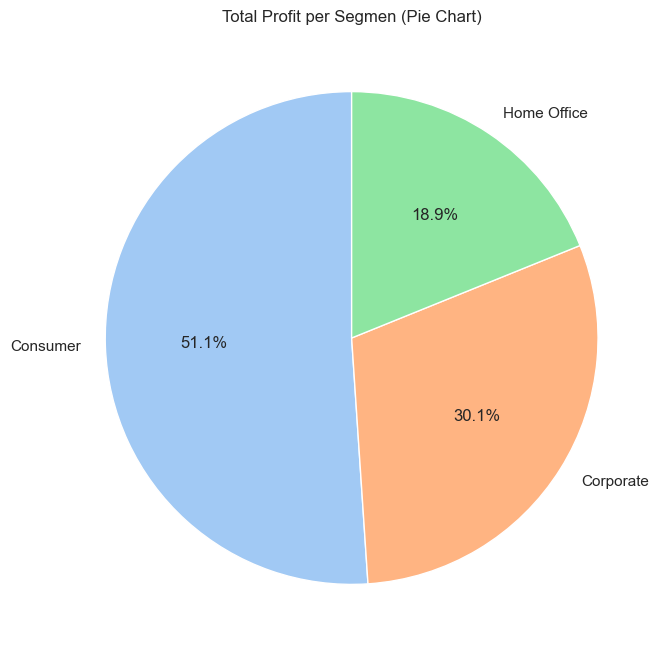

In [693]:
import matplotlib.pyplot as plt
import seaborn as sns

#melakukan penjumlahan profit berdasarkan segmen
total_profit_per_segment = df.groupby('Segment')['Profit'].sum()

#Visualisasi Profit per segmen
plt.figure(figsize=(8, 8))
plt.pie(total_profit_per_segment, labels=total_profit_per_segment.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=90)
plt.title('Total Profit per Segmen (Pie Chart)')
plt.show()

Insight : Berdasarkan data visualisasi diatas Segment tertinggi yang secara signifikan berkontribusi terhadap profitabilitas adalah dari segment consumer

### Apakah pelanggan yang sering berkunjung memberikan kontribusi pendapatan yang lebih besar?

- H0 : Tidak ada pengaruh yang signifikan antara pelanggan yang sering berkunjung dengan pendapatan 
- H1 : Ada pengaruh yang signifikan antara pelanggan yang sering berkunjung dengan pendapatan

In [694]:
# Menghitung frekuensi kunjungan pelanggan
customer_visit_frequency = df['Customer ID'].value_counts()

# Menyatukan data frekuensi kunjungan dengan data total penjualan per pelanggan
customer_data = pd.DataFrame({'Customer ID': customer_visit_frequency.index, 'Visit Frequency': customer_visit_frequency.values, })
customer_data = pd.merge(customer_data, df.groupby('Customer ID')[['Sales','Profit']].sum().reset_index(), on='Customer ID', how='left')

# Menentukan Kuartil atau Persentil
quartile_value = customer_data['Visit Frequency'].quantile(0.75)  # Contoh: 75% persentil

# Membuat kolom 'Frequent Visitor' berdasarkan kondisi pada kolom 'Visit Frequency'
customer_data['Frequent Visitor'] = customer_data['Visit Frequency'].apply(lambda x: 'Yes' if x > quartile_value else 'No')

customer_data

,Customer ID,Visit Frequency,Sales,Profit,Frequent Visitor
0,PO-18850,97,25274.47020,3249.27770,Yes
1,BE-11335,94,27158.01840,7790.69630,Yes
2,JG-15805,90,22015.38620,3393.22010,Yes
3,SW-20755,89,23321.58000,2295.70560,Yes
4,EM-13960,85,25228.52948,2593.94148,Yes
...,...,...,...,...,...
1585,MG-7650,1,301.71000,27.15000,No
1586,ME-8010,1,160.50000,15.90000,No
1587,RC-9825,1,37.44000,0.00000,No
1588,MG-7890,1,19.12800,-22.48200,No


Insight : Berdasarkan data diatas terdapat penambahan kolom visit frequncy dan frequency visitor guna untuk memudahkan analisis uji hiptesis yang akan dilakukan selanjutnya

c:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Kontribusi pendapatan rata-rata pelanggan yang sering berkunjung: 2008.203601542553
Kontribusi pendapatan rata-rata pelanggan yang tidak sering berkunjung: 586.7979712520594
Hasil Uji two sample (p-value): 5.353850527970495e-82


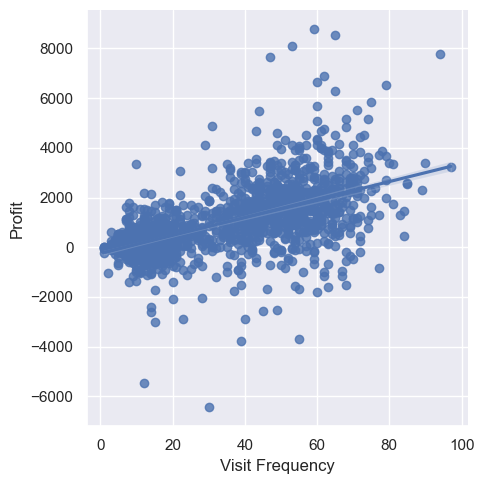

In [695]:
from scipy import stats


# Analisis Hubungan Antara Frekuensi Kunjungan dan Total Penjualan
sns.lmplot(data=customer_data,x='Visit Frequency', y='Profit')

# Memisahkan data antara pelanggan yang sering berkunjung dan yang tidak
frequent_visitors = customer_data[customer_data['Frequent Visitor'] == 'Yes']
infrequent_visitors = customer_data[customer_data['Frequent Visitor'] == 'No']

# Menghitung kontribusi pendapatan rata-rata untuk kedua kelompok
average_contribution_frequent = frequent_visitors['Profit'].mean()
average_contribution_infrequent = infrequent_visitors['Profit'].mean()

# Menjalankan uji two sample
t_stat, p_value = stats.ttest_ind(frequent_visitors['Profit'], infrequent_visitors['Profit'])

# Menampilkan hasil
print(f"Kontribusi pendapatan rata-rata pelanggan yang sering berkunjung: {average_contribution_frequent}")
print(f"Kontribusi pendapatan rata-rata pelanggan yang tidak sering berkunjung: {average_contribution_infrequent}")

# Menampilkan hasil uji two sample
print(f"Hasil Uji two sample (p-value): {p_value}")

Insight : Berdasarkan hasil analisis dapat disiimpulkan bahwa H0 ditolak karena hasil p-value kurang dari 0,5 maka pelanggan yang sering berkunjung memberikan kontribusi pendapatan yang signifikan lebih besar dibandingkan dengan pelanggan yang tidak sering berkunjung. Hasil uji statistik juga memvalidasi bahwa perbedaan ini bukanlah hasil kebetulan. Oleh karena itu, strategi pemasaran atau program loyalitas yang mengarah pada meningkatkan kunjungan pelanggan dapat memberikan dampak positif pada pendapatan perusahaan.

### Kapan waktu yang paling strategis untuk memperbarui atau meluncurkan produk baru agar memaksimalkan tren pasar yang meningkat?

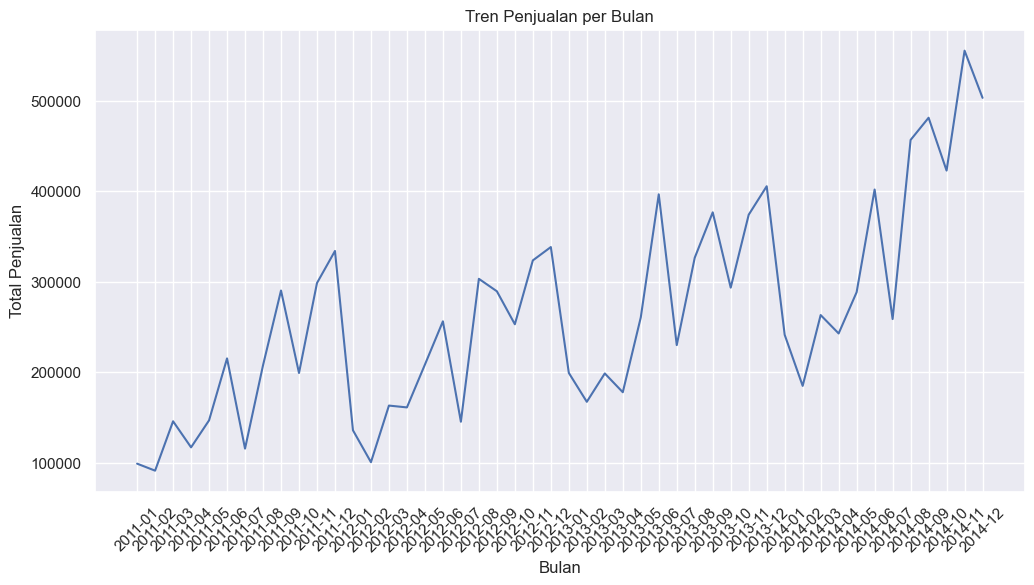

Puncak Penjualan Terjadi pada Bulan 2014-11 dengan Total Penjualan 555279.027
Lembah Penjualan Terjadi pada Bulan 2011-02 dengan Total Penjualan 91152.15698


In [696]:
# Ekstraksi bulan dan tahun dari kolom 'Order Date'
df['Month'] = df['Order Date'].dt.to_period('M')

# Menghitung jumlah penjualan per bulan
monthly_sales = df.groupby('Month')['Sales'].sum()

# Visualisasi tren penjualan per bulan
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_sales.index.astype(str), y=monthly_sales.values)
plt.title('Tren Penjualan per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Total Penjualan')
plt.xticks(rotation=45)
plt.show()

# Menampilkan data yang terdapat pada puncak dan lembah grafik
peak_sales_month = monthly_sales.idxmax()
peak_sales_value = monthly_sales.max()
valley_sales_month = monthly_sales.idxmin()
valley_sales_value = monthly_sales.min()
print(f"Puncak Penjualan Terjadi pada Bulan {peak_sales_month} dengan Total Penjualan {peak_sales_value}")
print(f"Lembah Penjualan Terjadi pada Bulan {valley_sales_month} dengan Total Penjualan {valley_sales_value}")


Insight : Berdasarkan grafik diatas dapat dilihat bahwa puncak penjualan terjadi pada bulan November tahun 2014 dengan total penjualan sebesar 555279.027

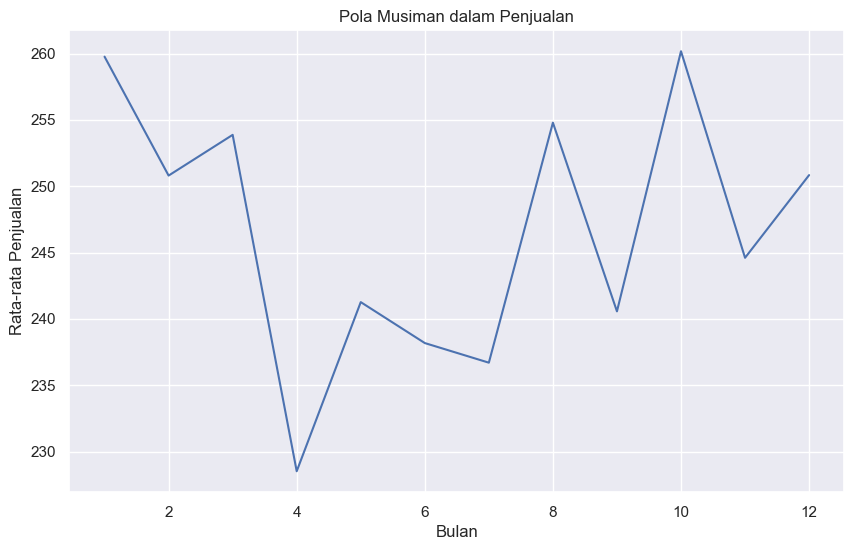

Puncak Penjualan Terjadi pada Bulan 10 dengan Total Penjualan 260.17469627616924
Lembah Penjualan Terjadi pada Bulan 4 dengan Total Penjualan 228.5120091069676


In [697]:
# Menghitung jumlah penjualan per musiman
seasonal_pattern = df.groupby(df['Order Date'].dt.month)['Sales'].mean()

# Visualisasi Pola Musiman
plt.figure(figsize=(10, 6))
sns.lineplot(x=seasonal_pattern.index, y=seasonal_pattern.values)
plt.title('Pola Musiman dalam Penjualan')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Penjualan')
plt.show()

# Menampilkan data yang terdapat pada puncak dan lembah grafik
peak_sales_seasonal = seasonal_pattern.idxmax()
peak_sales_value = seasonal_pattern.max()
valley_sales_seasonal = seasonal_pattern.idxmin()
valley_sales_value = seasonal_pattern.min()
print(f"Puncak Penjualan Terjadi pada Bulan {peak_sales_seasonal} dengan Total Penjualan {peak_sales_value}")
print(f"Lembah Penjualan Terjadi pada Bulan {valley_sales_seasonal} dengan Total Penjualan {valley_sales_value}")

Insight : Waktu yang paling strategis untuk memperbarui atau meluncurkan produk baru mungkin sebaiknya dipertimbangkan pada bulan Oktober, di mana terdapat puncak penjualan rata-rata yang tinggi. Meskipun puncak penjualan total terjadi pada November 2014, rata-rata penjualan pada bulan Oktober dapat memberikan indikasi bahwa konsumen cenderung berbelanja lebih banyak pada bulan tersebut secara konsisten dari waktu ke waktu.

### Dimana distribusi produk paling efisien dan mengoptimalkan biaya pengiriman?

In [742]:

df_shipping=df.groupby(['City', 'State', 'Country', 'Region']).agg({'Sales': 'sum', 'Shipping Cost': 'sum'}).reset_index()

# Membuat kolom 'Efficiency_Shipping' berdasarkan hasil bagi kolom 'sales' dengan Shipping Cost
df_shipping['Efficiency_Shipping'] = df_shipping['Sales'] / df_shipping['Shipping Cost']
df_shipping=df_shipping.sort_values(by='Efficiency_Shipping',ascending=False)

df_shipping


,City,State,Country,Region,Sales,Shipping Cost,Efficiency_Shipping
550,Buriticupu,Maranhão,Brazil,South,33.600,0.40,84.000000
1934,Lewiston,Idaho,United States,West,9.584,0.12,79.866667
3496,Urganch,Khorezm,Uzbekistan,EMEA,1124.100,14.31,78.553459
908,Darlington,England,United Kingdom,North,273.300,3.48,78.534483
3421,Torremolinos,Andalusía,Spain,South,33.210,0.48,69.187500
...,...,...,...,...,...,...,...
2052,Lázaro Cárdenas,Michoacán,Mexico,North,336.240,137.67,2.442362
1945,Libourne,Aquitaine,France,Central,355.482,146.12,2.432809
2861,Rock Hill,South Carolina,United States,South,11.850,5.06,2.341897
2604,Pensacola,Florida,United States,South,2.214,0.98,2.259184


Insight : Berdasarkan data diatas terdapat penambahan kolom Efficiency_Shipping dan telah di urutkan berdasarkan nilai efisiensi paling tinggi dan di dapat kota Buriticupu dari negara brazil yang mempunyai efisiensi terbaik diantara kota lain

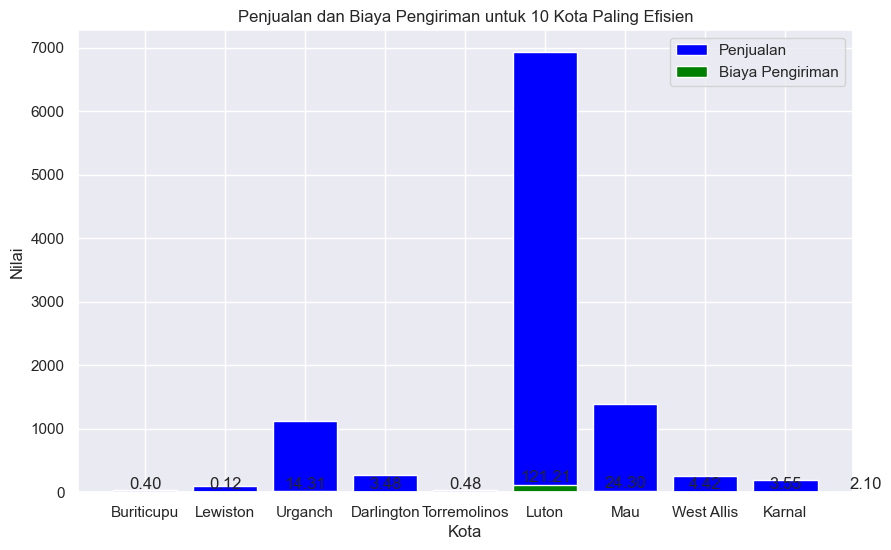

Kota Paling Efisien: Buriticupu
Total Biaya Pengiriman : 0.4
dengan jumlah penjualan: 33.6
Efiensi pengiriman: 84.0%


In [740]:
# Ambil 10 baris pertama dari DataFrame
df_top_10 = df_shipping.head(10)

# Visualisasi menggunakan bar plot
plt.figure(figsize=(10, 6))
plt.bar(df_top_10['City'], df_top_10['Sales'], color='blue', label='Penjualan')
plt.bar(df_top_10['City'], df_top_10['Shipping Cost'], color='green', label='Biaya Pengiriman')

plt.xlabel('Kota')
plt.ylabel('Nilai')
plt.title('Penjualan dan Biaya Pengiriman untuk 10 Kota Paling Efisien')
plt.legend()

# Tambahkan label di bar untuk Biaya Pengiriman
for i, value in enumerate(df_top_10['Shipping Cost']):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')

plt.show()

# Hasil analisis efisiensi distribusi
most_efficient_city = df_shipping.loc[df_shipping['Efficiency_Shipping'].idxmax()]
print(f"Kota Paling Efisien: {most_efficient_city['City']}")
print(f"Total Biaya Pengiriman : {most_efficient_city['Shipping Cost']}")
print(f"dengan jumlah penjualan: {most_efficient_city['Sales']}")
print(f"Efiensi pengiriman: {most_efficient_city['Efficiency_Shipping']}%")

Insight : Berdasarkan hasil analisis dapat disimpulkan bahwa distribusi produk di kota Buriticupu dianggap paling efisien dengan total biaya pengiriman 0.4 itu menunjukkan kemungkinan pengoptimalan biaya Dengan jumlah penjualan sebesar 33.6, distribusi di kota Buriticupu memberikan nilai efisiensi yang tinggi dari segi biaya pengiriman per unit penjualan dengan efisiensi 84%

### Mengapa terjadi fluktuasi dalam tingkat kepuasan pelanggan?

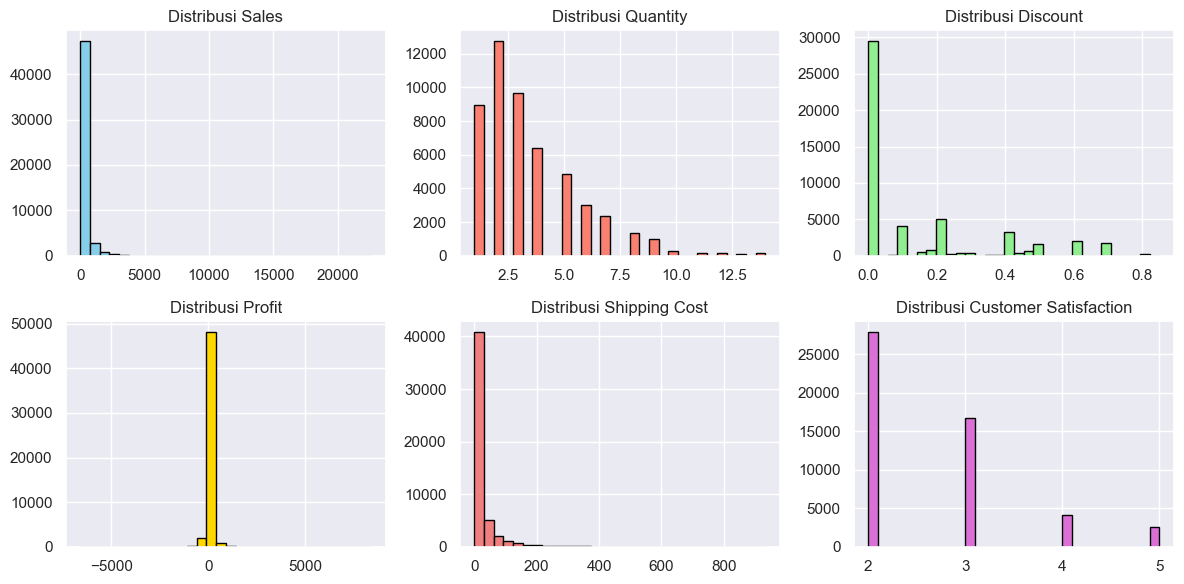

In [669]:
# Tambahkan kolom 'Customer Satisfaction' berdasarkan tingkat pembelian
df["Customer Satisfaction"] = df["Sales"].apply(lambda x: 5 if x >= 1000 else 4 if x >= 500 else 3 if x >= 100 else 2)

plt.figure(figsize=(12, 6))

# Visualisasi Sales
plt.subplot(2, 3, 1)
plt.hist(df['Sales'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribusi Sales')

# Visualisasi Quantity
plt.subplot(2, 3, 2)
plt.hist(df['Quantity'], bins=30, color='salmon', edgecolor='black')
plt.title('Distribusi Quantity')

# Visualisasi Discount
plt.subplot(2, 3, 3)
plt.hist(df['Discount'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Distribusi Discount')

# Visualisasi Profit
plt.subplot(2, 3, 4)
plt.hist(df['Profit'], bins=30, color='gold', edgecolor='black')
plt.title('Distribusi Profit')

# Visualisasi Shipping Cost
plt.subplot(2, 3, 5)
plt.hist(df['Shipping Cost'], bins=30, color='lightcoral', edgecolor='black')
plt.title('Distribusi Shipping Cost')

# Visualisasi Customer Satisfaction
plt.subplot(2, 3, 6)
plt.hist(df['Customer Satisfaction'], bins=30, color='orchid', edgecolor='black')
plt.title('Distribusi Customer Satisfaction')

plt.tight_layout()
plt.show()

Insight :
- Distribusi penjualan yang tinggi menunjukkan bahwa produk atau layanan perusahaan tersedia secara luas dan mudah diakses oleh pelanggan. Hal ini dapat meningkatkan kepuasan pelanggan karena pelanggan dapat dengan mudah mendapatkan produk atau layanan yang mereka butuhkan.

- Distribusi kuantitas yang tinggi menunjukkan bahwa produk atau layanan perusahaan tersedia dalam jumlah yang cukup untuk memenuhi permintaan pelanggan. Hal ini juga dapat meningkatkan kepuasan pelanggan karena pelanggan tidak perlu khawatir produk atau layanan yang mereka inginkan akan habis.

- Distribusi diskon yang tinggi menunjukkan bahwa perusahaan menawarkan diskon yang menarik bagi pelanggan. Hal ini dapat meningkatkan kepuasan pelanggan karena pelanggan dapat menghemat uang dengan membeli produk atau layanan perusahaan.

- Distribusi biaya pengiriman yang rendah menunjukkan bahwa biaya pengiriman produk atau layanan perusahaan terjangkau bagi pelanggan. Hal ini juga dapat meningkatkan kepuasan pelanggan karena pelanggan tidak perlu mengeluarkan biaya yang besar untuk mendapatkan produk atau layanan yang mereka inginkan.

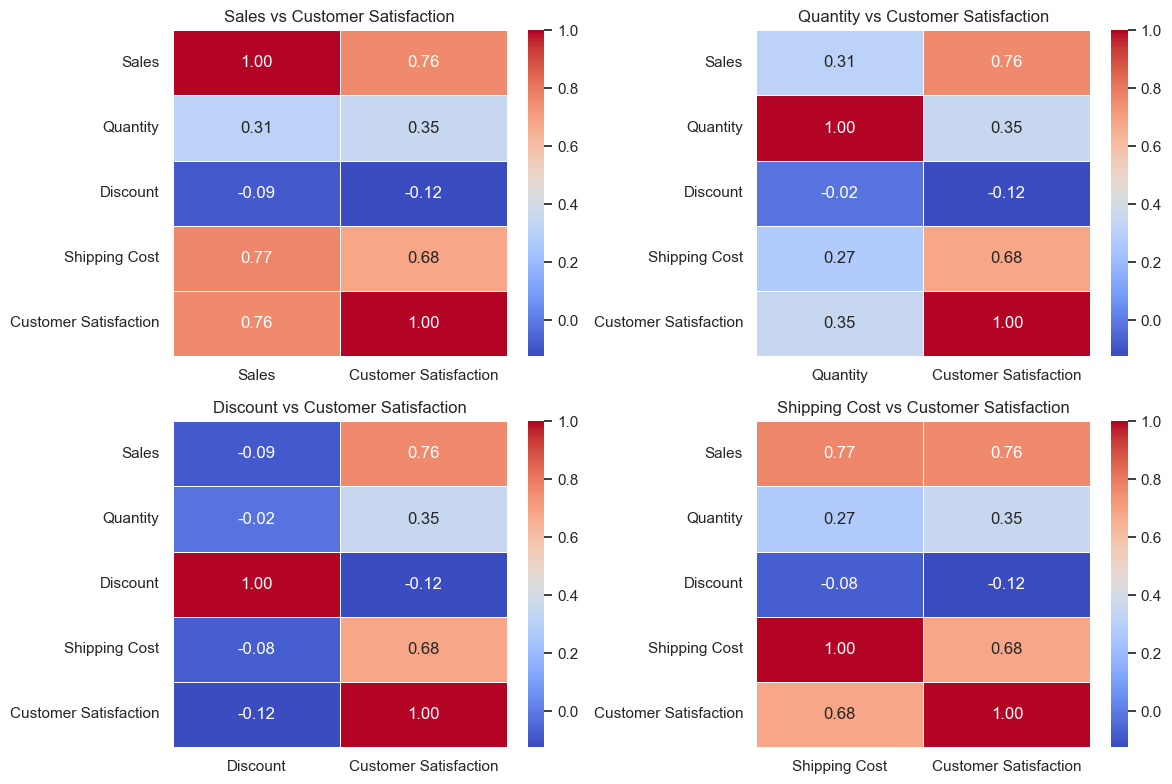

In [670]:
# Ambil data dari dataset Anda
cols_to_plot = ['Sales', 'Quantity', 'Discount', 'Shipping Cost', 'Customer Satisfaction']
subset_data = df[cols_to_plot]

# Menghitung matriks korelasi
correlation_matrix = subset_data.corr()

# Membuat subplot heatmap
plt.figure(figsize=(12, 8))

# Sales
plt.subplot(2, 2, 1)
sns.heatmap(correlation_matrix[['Sales', 'Customer Satisfaction']], annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Sales vs Customer Satisfaction')

# Quantity
plt.subplot(2, 2, 2)
sns.heatmap(correlation_matrix[['Quantity', 'Customer Satisfaction']], annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Quantity vs Customer Satisfaction')

# Discount
plt.subplot(2, 2, 3)
sns.heatmap(correlation_matrix[['Discount', 'Customer Satisfaction']], annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Discount vs Customer Satisfaction')

# Shipping Cost
plt.subplot(2, 2, 4)
sns.heatmap(correlation_matrix[['Shipping Cost', 'Customer Satisfaction']], annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Shipping Cost vs Customer Satisfaction')

plt.tight_layout()
plt.show()

Insight :

Dari grafik tersebut, dapat dilihat bahwa kepuasan pelanggan cenderung meningkat seiring dengan peningkatan penjualan dan kuantitas. Namun, kepuasan pelanggan cenderung menurun seiring dengan peningkatan diskon.Ada beberapa kemungkinan penjelasan untuk hubungan ini.
- Kemungkinan pertama adalah bahwa pelanggan yang puas lebih cenderung untuk membeli lebih banyak produk atau layanan. Hal ini karena mereka percaya bahwa produk atau layanan tersebut sepadan dengan harganya.
- Kemungkinan kedua adalah bahwa penjualan dan kuantitas dapat meningkatkan kepuasan pelanggan karena pelanggan merasa bahwa mereka mendapatkan nilai yang sepadan dengan uang yang mereka keluarkan.
- Kemungkinan ketiga adalah bahwa diskon dapat menurunkan kepuasan pelanggan. Namun, discount dapat berdampak positif terhadap kepuasan pelanggan dalam jangka pendek. Discount dapat menarik pelanggan baru dan membuat pelanggan yang sudah ada merasa puas karena mereka mendapatkan harga yang lebih murah, tetapi dalam jangka panjang discount dapat berdampak negatif terhadap kepuasan pelanggan, hal ini dapat terjadi jika discount terlalu sering diberikan atau terlalu besar.

### Bagaimana merancang strategi pemasaran yang lebih tepat terkait dengan waktu pengiriman?

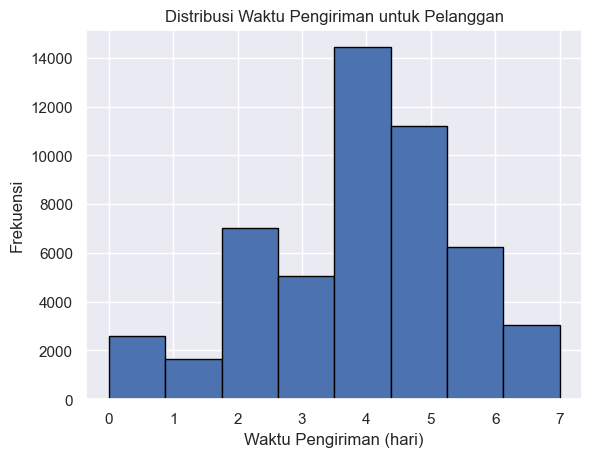

Mean Waktu Pengiriman: 4 hari
Median Waktu Pengiriman: 4 hari
Standar Deviasi Waktu Pengiriman: 2 hari


In [725]:
# Hitung 'Delivery Time' sebagai perbedaan antara 'Ship Date' dan 'Order Date'
df['Delivery Time'] = (df['Ship Date'] - df['Order Date']).dt.days

# Analisis statistika deskriptif waktu pengiriman
mean_delivery_time = df['Delivery Time'].mean()
median_delivery_time = df['Delivery Time'].median()
std_dev_delivery_time = df['Delivery Time'].std()

# Visualisasi distribusi waktu pengiriman
plt.hist(df['Delivery Time'], bins=int(max(df['Delivery Time']) - min(df['Delivery Time']) + 1), edgecolor='black')
plt.title('Distribusi Waktu Pengiriman untuk Pelanggan')
plt.xlabel('Waktu Pengiriman (hari)')
plt.ylabel('Frekuensi')
plt.show()

# Menampilkan informasi statistika deskriptif
print(f"Mean Waktu Pengiriman: {mean_delivery_time:.0f} hari")
print(f"Median Waktu Pengiriman: {median_delivery_time:.0f} hari")
print(f"Standar Deviasi Waktu Pengiriman: {std_dev_delivery_time:.0f} hari")

Insight : 
- Rata-rata waktu pengiriman adalah 4 hari. Ini memberikan gambaran umum tentang waktu yang diharapkan untuk pengiriman. Strategi pemasaran dapat memanfaatkan informasi ini untuk menentukan janji pengiriman yang dapat diiklankan kepada pelanggan korporat.
- Median yang sama dengan mean menunjukkan bahwa distribusi waktu pengiriman mungkin cukup simetris. Ini bisa diartikan bahwa sebagian besar pengiriman terjadi dalam rentang waktu yang relatif kecil di sekitar nilai rata-rata. Pemasaran dapat menekankan kehandalan pengiriman dalam jangka waktu yang konsisten.
- Standar deviasi yang lebih rendah menunjukkan bahwa sebagian besar waktu pengiriman berada dalam kisaran yang relatif kecil dari nilai rata-rata. Ini bisa dijadikan dasar untuk menetapkan janji pengiriman yang dapat diandalkan dan memberikan kepuasan kepada pelanggan korporat.

In [741]:
# menyimpan data yang sudah di analisis untuk di buat visualiasi pada dashboard
df.to_csv('main.csv', index=False)
customer_data.to_csv('main2.csv', index=False)
df_shipping.to_csv('main3.csv', index=False)

# Kesimpulan

Berdasarkan data yang di analasisis didapatkan hasil berikut :
- Segment tertinggi yang secara signifikan berkontribusi terhadap profitabilitas adalah dari segment consumer
- Pelanggan yang sering berkunjung memberikan kontribusi pendapatan yang signifikan lebih besar dibandingkan dengan pelanggan yang tidak sering berkunjung. Oleh karena itu, strategi pemasaran atau program loyalitas yang mengarah pada meningkatkan kunjungan pelanggan dapat memberikan dampak positif pada pendapatan perusahaan.
- Waktu yang paling strategis untuk memperbarui atau meluncurkan produk baru mungkin sebaiknya dipertimbangkan pada bulan Oktober, di mana terdapat puncak penjualan rata-rata yang tinggi. Meskipun puncak penjualan total terjadi pada November 2014, rata-rata penjualan pada bulan Oktober dapat memberikan indikasi bahwa konsumen cenderung berbelanja lebih banyak pada bulan tersebut secara konsisten dari waktu ke waktu.
- strategi penjualan, distribusi, dan kebijakan diskon dapat menjadi faktor utama yang berkontribusi pada fluktuasi tingkat kepuasan pelanggan. Oleh karena itu, perusahaan perlu mempertimbangkan keseimbangan antara menarik pelanggan melalui diskon dan menjaga kepuasan pelanggan dalam jangka panjang
- Distribusi produk di kota Buriticupu dianggap paling efisien dengan total biaya pengiriman terendah.itu menunjukkan kemungkinan pengoptimalan biaya, distribusi di kota Buriticupu memberikan nilai efisiensi yang tinggi dari segi biaya pengiriman per unit penjualan sebesar 84%
- Perusahaan dapat menonjolkan janji pengiriman konsisten, memberikan penekanan pada ketelitian distribusi waktu pengiriman yang relatif simetris, perusahaan dapat membangun reputasi yang kuat dalam hal kehandalan layanan pengiriman.

Maka kesimpulannya : Dengan merancang strategi pemasaran dan distribusi yang terfokus pada segmen consumer yang memberikan kontribusi profit signifikan, melibatkan program loyalitas untuk meningkatkan kunjungan pelanggan, dan mempertimbangkan pemilihan waktu strategis untuk meluncurkan produk baru pada bulan Oktober, perusahaan dapat mencapai pertumbuhan keuntungan sebesar 20%. Penonjolan janji pengiriman konsisten, ketelitian distribusi waktu pengiriman, akan memperkuat reputasi perusahaan dalam kehandalan layanan pengiriman. Penerapan strategi efisiensi biaya di kota Buriticupu juga dapat mendukung upaya meningkatkan profitabilitas. Serta penyeimbangan dalam strategi penjualan, distribusi, dan kebijakan diskon diperlukan untuk menjaga keseimbangan antara daya tarik pelanggan dan kepuasan pelanggan jangka panjang agar bisa mencapai keunggulan kompetitif.